In [1]:
!pip install -U imbalanced-learn

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df.tail(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1580,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


# Exploratory Data Analysis(EDA)

In [7]:
# Checking the dimensions of the dataset.
df.shape

(1599, 12)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# Checking types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

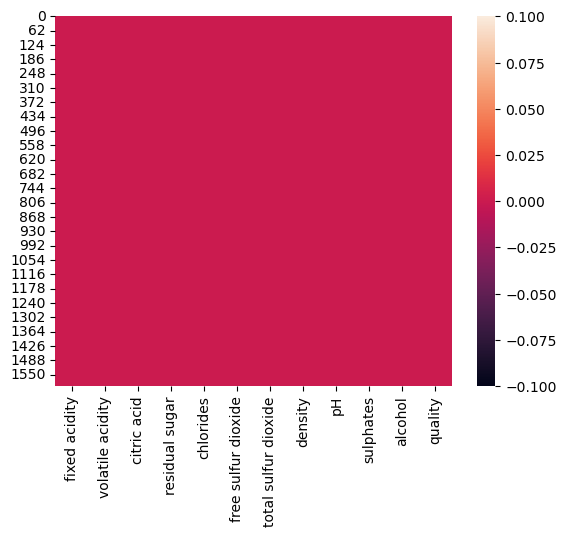

In [12]:
# Now visualize using heatmap.
sns.heatmap(df.isnull())

In [13]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
df['quality'].nunique()

6

In [15]:
# Checking value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

# Description of Dataset

In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### 1) Count of eall columns are same and there are no missing values in the dataset.
#### 2)Mean is greater than median, right skewness is possible.
#### 3)Between 75% and max, huge difference can be seen, outliers are present.

# Data Visualization

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


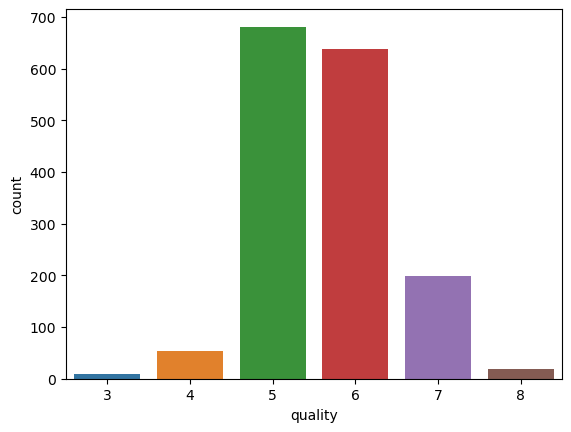

In [17]:
ax = sns.countplot(x = 'quality', data = df)
print(df['quality'].value_counts())

##### As we can see the difference is huge, this leads to class imbalance issue which can be rectified by oversampling.

# Checking for Outliers

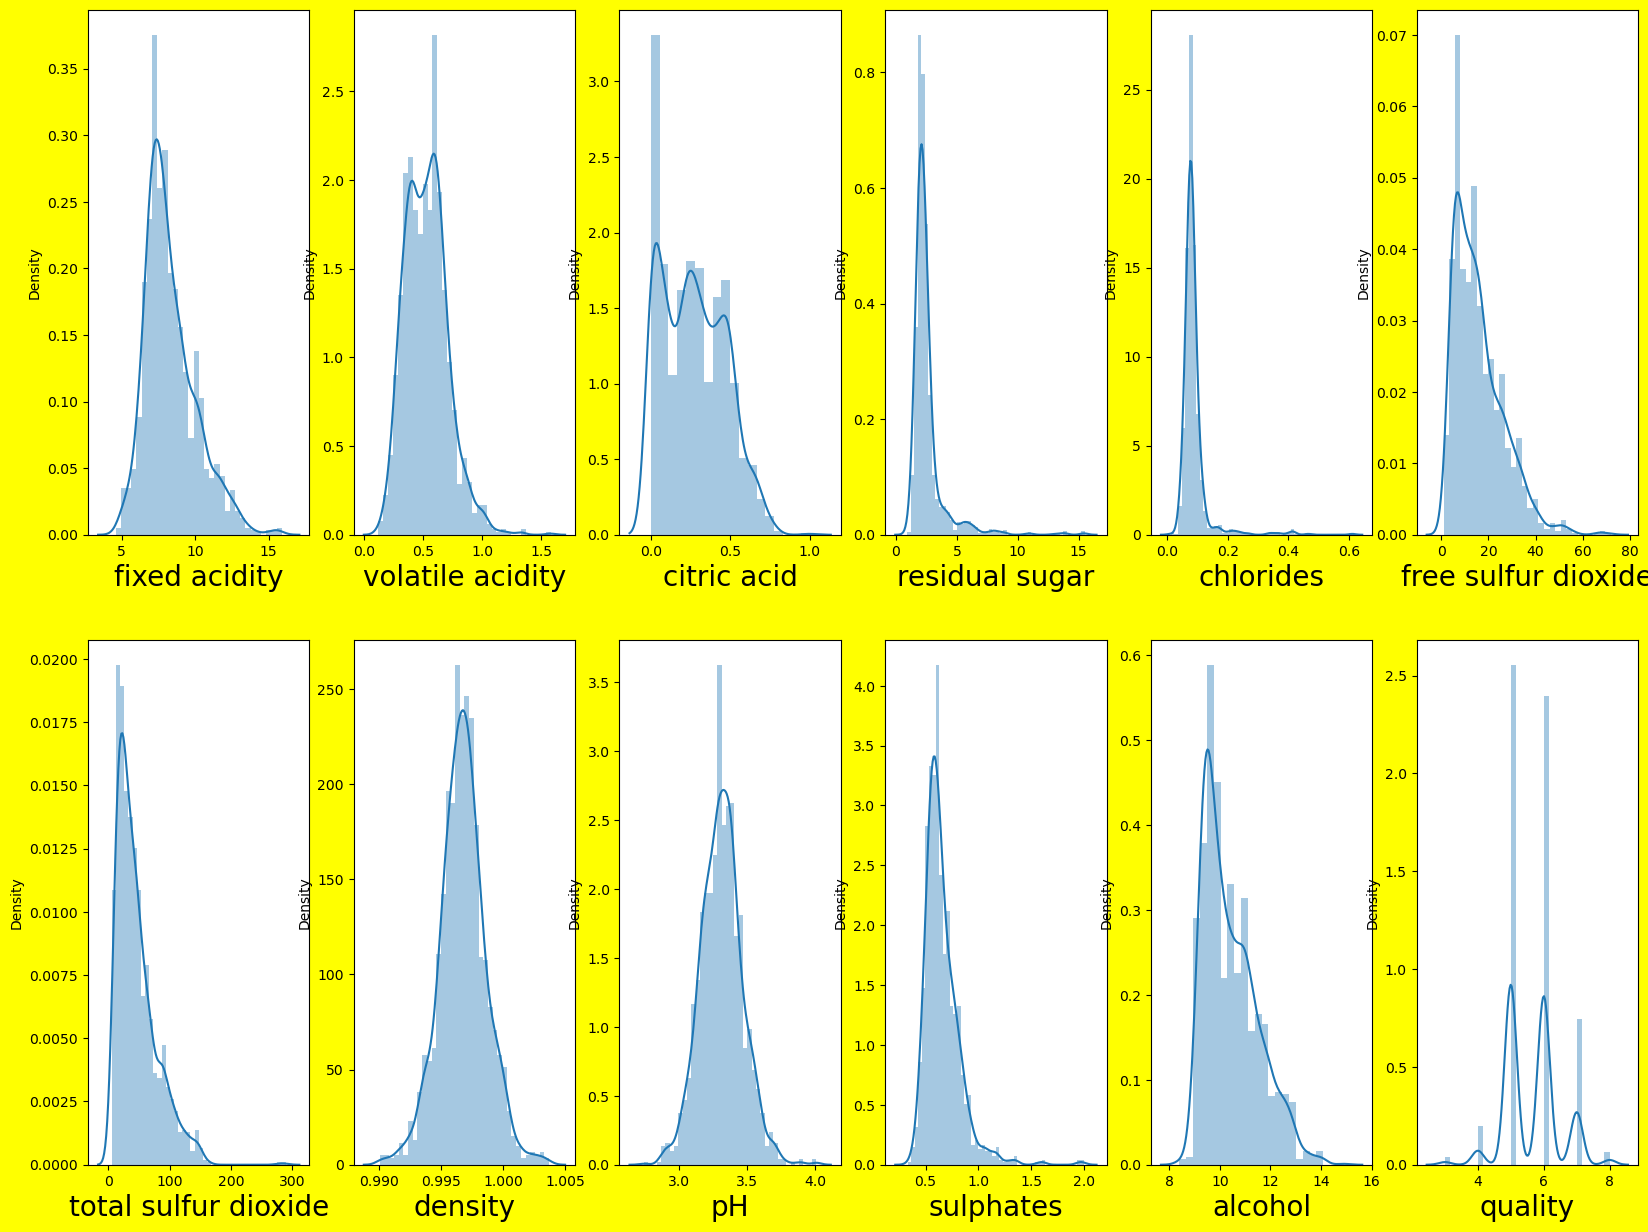

In [19]:
plt.figure(figsize=(20, 15), facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 17:
        ax = plt.subplot(2, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1 
plt.show()   

In [21]:
# Checking for skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [22]:
df['residual sugar'] = np.cbrt(df['residual sugar'])

In [23]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.532201
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [35]:
# Dividing dataset into features and label
y = df['quality']
x = df.drop(columns = ['quality'])

In [25]:
df['chlorides'] = np.log(df['chlorides'])

In [26]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.532201
chlorides               1.745215
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [27]:
# Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold = 3
np.where(z<3)

(array([   0,    0,    0, ..., 1598, 1598, 1598], dtype=int64),
 array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))

In [28]:
df=df[(z<3).all(axis = 1)]
df.shape

(1447, 12)

# Correlation between Target variable and Independent variable

In [29]:
cor = df.corr()

<Axes: >

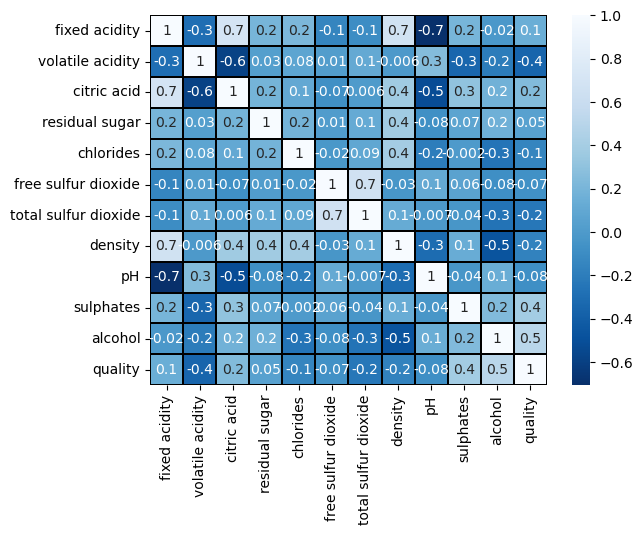

In [36]:
sns.heatmap(df.corr(),linewidth = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")

In [37]:
cor['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.502824
sulphates               0.386005
citric acid             0.242767
fixed acidity           0.144105
residual sugar          0.053636
free sulfur dioxide    -0.069279
pH                     -0.081633
chlorides              -0.147339
density                -0.170481
total sulfur dioxide   -0.236449
volatile acidity       -0.353923
Name: quality, dtype: float64

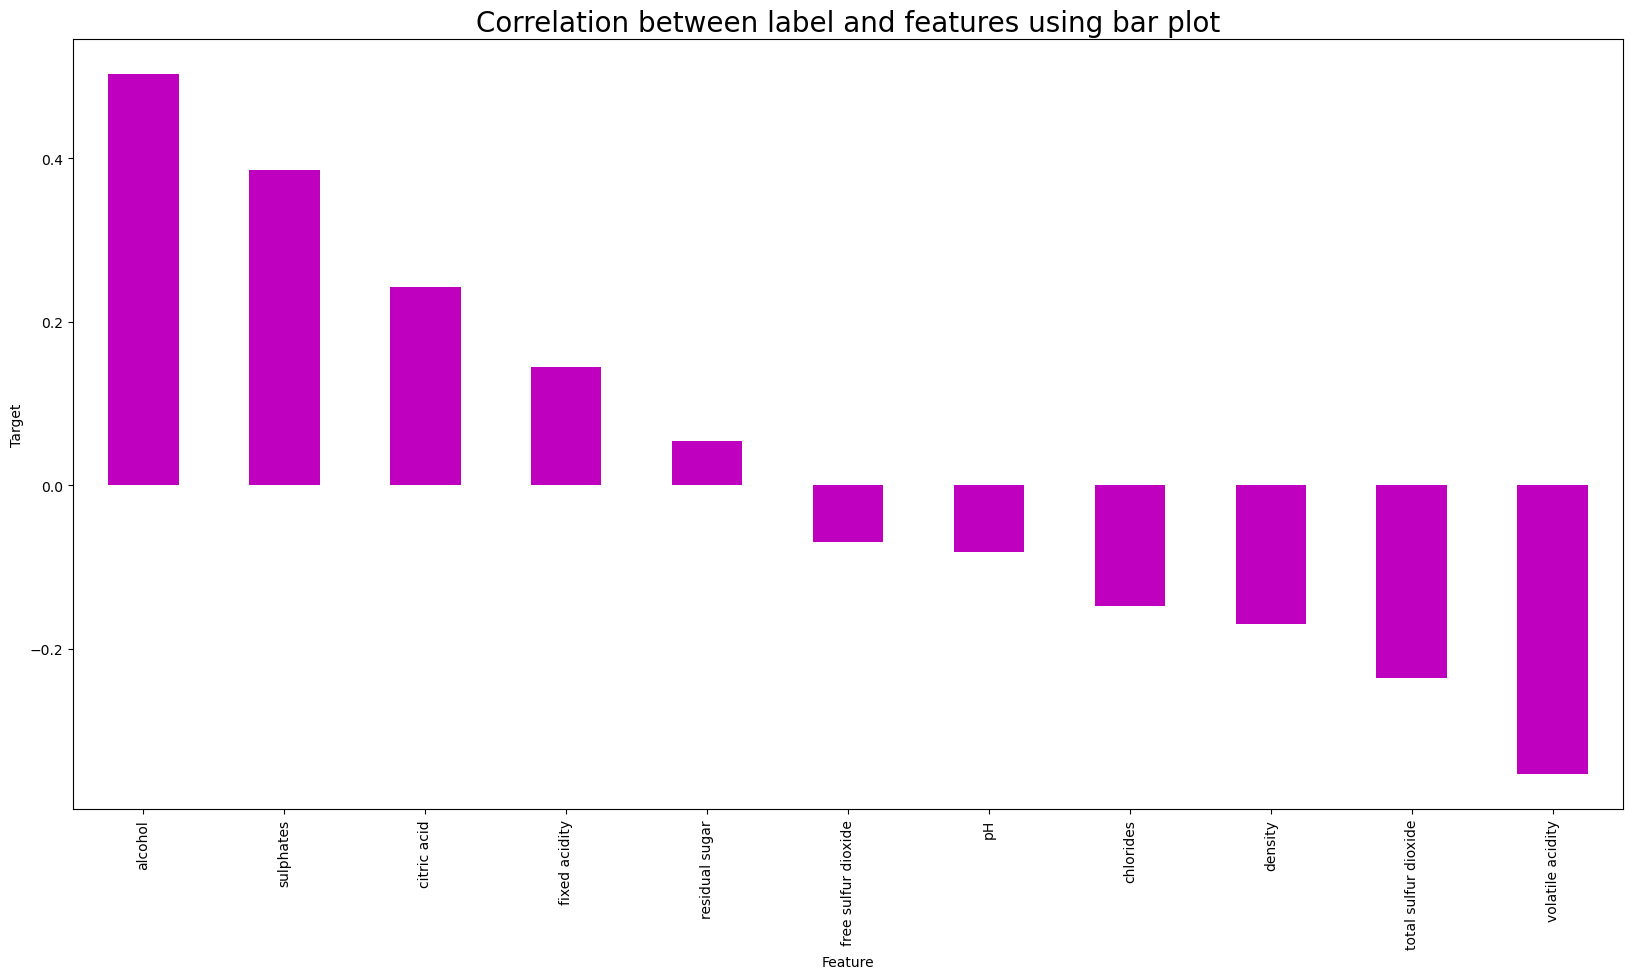

In [38]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize=(20, 10))
df.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind = 'bar', color = 'm')
plt.xlabel('Feature', fontsize = 10)
plt.ylabel('Target', fontsize = 10)
plt.title("Correlation between label and features using bar plot", fontsize = 20)
plt.show()

In [33]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

# Feature Scaling Using Standard Scalarization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.551377,1.051284,-1.388422,-0.611062,-0.171830,-0.443957,-0.333309,0.639063,1.373639,-0.635797,-1.002320
1,-0.308595,2.119256,-1.388422,0.395245,0.954725,1.060506,0.787762,0.055630,-0.821961,0.288437,-0.610331
2,-0.308595,1.407275,-1.178983,-0.010670,0.674768,-0.014110,0.346128,0.172316,-0.397006,0.057379,-0.610331
3,1.755052,-1.440651,1.543728,-0.611062,-0.230522,0.200813,0.549959,0.755749,-1.105265,-0.481758,-0.610331
4,-0.551377,1.051284,-1.388422,-0.611062,-0.171830,-0.443957,-0.333309,0.639063,1.373639,-0.635797,-1.002320
...,...,...,...,...,...,...,...,...,...,...,...
1442,-1.279723,0.457966,-0.969543,-0.453608,0.577376,1.812737,0.006409,-1.052893,0.948684,-0.481758,0.075648
1443,-1.461809,0.161307,-0.864824,-0.153792,-1.074012,2.564969,0.244212,-0.924538,1.444465,0.904594,0.761628
1444,-1.219027,-0.076020,-0.707744,-0.010670,-0.171830,1.490353,-0.129478,-0.562809,0.736207,0.827574,0.565633
1445,-1.461809,0.724959,-0.760104,-0.453608,-0.230522,1.812737,0.006409,-0.720336,1.798594,0.519496,-0.218343


### Checking Variance Inflation Factor

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF values,Features
0,8.006933,fixed acidity
1,1.854521,volatile acidity
2,3.183018,citric acid
3,1.773690,residual sugar
4,1.238419,chlorides
5,1.925758,free sulfur dioxide
6,2.194445,total sulfur dioxide
7,6.796749,density
8,3.238248,pH
9,1.315294,sulphates


In [41]:
x.shape[1]

11

# Oversampling

In [42]:
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [43]:
y.value_counts()

quality
5    617
6    583
7    184
4     47
8     16
Name: count, dtype: int64

In [44]:
y1.value_counts()

quality
5    617
6    617
7    617
4    617
8    617
Name: count, dtype: int64

##### Now, As the data is balanced, machine learning classification models can be built now.

# Model Building

In [45]:
df['best quality'] = [1 if x >= 7 else 0 for x in df.quality]
    

In [46]:
from sklearn.model_selection import train_test_split
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']
 
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.25, random_state=70)
 
xtrain.shape, xtest.shape

((1085, 11), (362, 11))

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x1, y1)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
important_features = pd.Series(feature_importances, index=x1.columns).sort_values(ascending=False)

print('Important Features:')
print(important_features)


k = 5  
selected_features = important_features.head(k).index.tolist()

# Update x1 with selected features
x_selected = x1[selected_features]

Important Features:
sulphates               0.140718
alcohol                 0.129009
volatile acidity        0.114275
chlorides               0.092959
total sulfur dioxide    0.092854
pH                      0.084530
citric acid             0.076057
density                 0.073270
residual sugar          0.069890
free sulfur dioxide     0.065050
fixed acidity           0.061388
dtype: float64


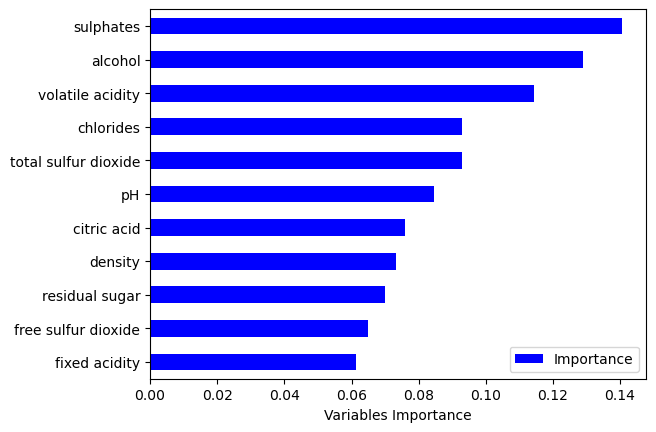

In [48]:
importance = pd.DataFrame({'Importance': rf_classifier.feature_importances_}, index=x.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind="barh", color="b")
plt.xlabel('Variables Importance')
plt.legend(loc="lower right")
plt.show()

##### Here we can clearly see the Top 5 features.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(x_selected, y1, test_size=0.25, random_state=60)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=60)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8173575129533679
Classification Report:
              precision    recall  f1-score   support

           4       0.88      0.90      0.89       168
           5       0.71      0.68      0.70       146
           6       0.72      0.68      0.70       149
           7       0.85      0.80      0.83       164
           8       0.90      1.00      0.94       145

    accuracy                           0.82       772
   macro avg       0.81      0.82      0.81       772
weighted avg       0.81      0.82      0.81       772



# Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion' : ['gini', 'entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, -1],
              'n_estimators' : [50, 100, 200, 300]}

In [53]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)

In [54]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, -1],
                         'random_state': [10, 50, 1000]})

In [55]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [61]:
Final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 100, n_jobs = -2, random_state = 70)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

81.47668393782384


In [62]:
# Saving Model
import joblib
joblib.dump(Final_model, "Red_Wine_Dataset_Analysis.pkl")

['Red_Wine_Dataset_Analysis.pkl']

In [63]:
model = joblib.load("Red_Wine_Dataset_Analysis.pkl")
predictions = model.predict(x_test)
predictions

array([8, 4, 7, 8, 6, 7, 7, 4, 4, 7, 4, 4, 5, 5, 4, 8, 6, 4, 8, 5, 7, 6,
       7, 5, 4, 4, 5, 6, 4, 7, 6, 6, 5, 4, 7, 5, 6, 8, 4, 4, 6, 4, 4, 6,
       7, 8, 5, 5, 4, 8, 6, 5, 4, 4, 4, 5, 5, 5, 7, 4, 8, 4, 4, 8, 7, 7,
       5, 6, 7, 5, 4, 8, 8, 8, 6, 4, 6, 6, 8, 8, 6, 6, 6, 4, 8, 6, 4, 5,
       8, 7, 4, 7, 6, 7, 6, 7, 7, 4, 4, 8, 5, 5, 8, 5, 8, 7, 8, 8, 7, 7,
       4, 8, 7, 7, 4, 4, 8, 5, 7, 4, 7, 4, 8, 4, 8, 5, 6, 4, 6, 6, 6, 4,
       4, 4, 7, 8, 5, 6, 4, 8, 7, 6, 4, 8, 8, 4, 8, 8, 4, 8, 8, 5, 4, 5,
       7, 6, 5, 6, 7, 5, 8, 7, 4, 7, 4, 4, 4, 5, 8, 4, 6, 7, 7, 8, 5, 6,
       6, 8, 8, 7, 7, 4, 7, 7, 4, 8, 4, 7, 8, 6, 8, 5, 7, 8, 6, 4, 5, 6,
       5, 7, 6, 8, 4, 8, 8, 4, 7, 8, 6, 7, 8, 4, 8, 4, 5, 8, 4, 5, 8, 4,
       7, 6, 5, 7, 7, 8, 6, 7, 7, 7, 5, 4, 8, 6, 5, 6, 6, 7, 5, 5, 8, 4,
       6, 8, 5, 4, 5, 8, 4, 5, 6, 8, 5, 7, 8, 6, 7, 5, 7, 4, 6, 5, 8, 7,
       7, 6, 5, 6, 4, 5, 6, 5, 4, 8, 6, 8, 4, 5, 4, 5, 7, 7, 6, 7, 6, 7,
       8, 7, 8, 4, 6, 4, 7, 6, 6, 7, 5, 5, 7, 7, 4,

In [64]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = predictions
df['Original'] = a
df

,Predicted,Original
0,8,8
1,4,4
2,7,7
3,8,8
4,6,6
...,...,...
767,7,7
768,7,7
769,7,7
770,6,6
